### Import Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
os.chdir('C:/Users/ASUS/Documents/Datasets')

In [4]:
df = pd.read_csv('training_set.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Missing Value

In [5]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
m = df.isna().sum()
m[m>0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

### Define Target 

In [7]:
# independent variable
x = df.drop(['Id', 'SalePrice'], axis = 1)

# dependent variable 
y = df['SalePrice']

In [8]:
x.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [9]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

### Separate Data in Continuous and Categorical

In [10]:
cat=[]
con=[]

for i in x.columns:
    if x[i].dtypes=='object':
        cat.append(i)
    else:
        con.append(i)

In [11]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [12]:
con

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

# Preprocessing

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

### Numerical Pipeline

In [14]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),('scaler',StandardScaler())])
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scaler', StandardScaler())])

### Categorical Pipeline

In [15]:
cat_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='constant',fill_value='not_available')),('encode',OrdinalEncoder())])
cat_pipe

Pipeline(steps=[('impute',
                 SimpleImputer(fill_value='not_available',
                               strategy='constant')),
                ('encode', OrdinalEncoder())])

### Column Transformer

In [16]:
pre=ColumnTransformer([('num_pipe',num_pipe,con),('cat_pipe',cat_pipe,cat)])
pre

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['MSSubClass', 'LotFrontage', 'LotArea',
                                  'OverallQual', 'OverallCond', 'YearBuilt',
                                  'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                  'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                                  'GrLivArea', 'BsmtFullBath', 'BsmtHalfBa...
                                 ['MSZoning', 'Street', 'Alley', 'LotShape',
                                  'LandContour', 'Utilities', 'LotConfig',
                                  'LandSlope', 'Neighborhood', 'Condition1',
                                  'Condition2', 'BldgType', 'HouseStyle',
                                  'RoofStyle', 'RoofMatl', 'Exterior1st',
                                  'Exterior2nd', 'MasVnrType', 'ExterQual',
                                  'ExterCond', 'Foundation', 'BsmtQual',
                                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                  'BsmtFinType2', 'Heating', 'HeatingQC',
                                  'CentralAir', 'Electrical', ...])])

### Fit Transform

In [17]:
x1=pd.DataFrame(pre.fit_transform(x),columns=pre.get_feature_names_out())
x1.head()

,num_pipe__MSSubClass,num_pipe__LotFrontage,num_pipe__LotArea,num_pipe__OverallQual,num_pipe__OverallCond,num_pipe__YearBuilt,num_pipe__YearRemodAdd,num_pipe__MasVnrArea,num_pipe__BsmtFinSF1,num_pipe__BsmtFinSF2,...,cat_pipe__GarageType,cat_pipe__GarageFinish,cat_pipe__GarageQual,cat_pipe__GarageCond,cat_pipe__PavedDrive,cat_pipe__PoolQC,cat_pipe__Fence,cat_pipe__MiscFeature,cat_pipe__SaleType,cat_pipe__SaleCondition
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,...,1.0,1.0,4.0,4.0,2.0,3.0,4.0,4.0,8.0,4.0
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,...,1.0,1.0,4.0,4.0,2.0,3.0,4.0,4.0,8.0,4.0
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,...,1.0,1.0,4.0,4.0,2.0,3.0,4.0,4.0,8.0,4.0
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,...,5.0,2.0,4.0,4.0,2.0,3.0,4.0,4.0,8.0,0.0
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,...,1.0,1.0,4.0,4.0,2.0,3.0,4.0,4.0,8.0,4.0


## Feature Selection

In [18]:
from sklearn.feature_selection import SequentialFeatureSelector 
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()

In [20]:
sfs = SequentialFeatureSelector(lr, n_features_to_select="auto", direction="backward")
sfs.fit(x1, y)

SequentialFeatureSelector(direction='backward', estimator=LinearRegression())

In [21]:
cols = sfs.get_feature_names_out()
cols

array(['num_pipe__MSSubClass', 'num_pipe__LotArea',
       'num_pipe__OverallQual', 'num_pipe__OverallCond',
       'num_pipe__YearBuilt', 'num_pipe__MasVnrArea',
       'num_pipe__BsmtUnfSF', 'num_pipe__1stFlrSF', 'num_pipe__2ndFlrSF',
       'num_pipe__LowQualFinSF', 'num_pipe__GrLivArea',
       'num_pipe__BsmtFullBath', 'num_pipe__KitchenAbvGr',
       'num_pipe__TotRmsAbvGrd', 'num_pipe__Fireplaces',
       'num_pipe__GarageCars', 'num_pipe__WoodDeckSF',
       'num_pipe__ScreenPorch', 'num_pipe__YrSold', 'cat_pipe__Alley',
       'cat_pipe__LandContour', 'cat_pipe__Neighborhood',
       'cat_pipe__BldgType', 'cat_pipe__HouseStyle', 'cat_pipe__RoofMatl',
       'cat_pipe__Exterior1st', 'cat_pipe__MasVnrType',
       'cat_pipe__ExterQual', 'cat_pipe__BsmtQual', 'cat_pipe__BsmtCond',
       'cat_pipe__BsmtExposure', 'cat_pipe__BsmtFinType2',
       'cat_pipe__HeatingQC', 'cat_pipe__KitchenQual',
       'cat_pipe__Functional', 'cat_pipe__FireplaceQu',
       'cat_pipe__GarageCond', '

In [22]:
x2 = pd.DataFrame(sfs.fit_transform(x1, y), columns=cols)
x2.head()

,num_pipe__MSSubClass,num_pipe__LotArea,num_pipe__OverallQual,num_pipe__OverallCond,num_pipe__YearBuilt,num_pipe__MasVnrArea,num_pipe__BsmtUnfSF,num_pipe__1stFlrSF,num_pipe__2ndFlrSF,num_pipe__LowQualFinSF,...,cat_pipe__BsmtExposure,cat_pipe__BsmtFinType2,cat_pipe__HeatingQC,cat_pipe__KitchenQual,cat_pipe__Functional,cat_pipe__FireplaceQu,cat_pipe__GarageCond,cat_pipe__Fence,cat_pipe__MiscFeature,cat_pipe__SaleCondition
0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.511418,-0.944591,-0.793434,1.161852,-0.120242,...,3.0,5.0,0.0,2.0,6.0,5.0,4.0,4.0,4.0,4.0
1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.574410,-0.641228,0.257140,-0.795163,-0.120242,...,1.0,5.0,0.0,3.0,6.0,4.0,4.0,4.0,4.0,4.0
2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.323060,-0.301643,-0.627826,1.189351,-0.120242,...,2.0,5.0,0.0,2.0,6.0,4.0,4.0,4.0,4.0,4.0
3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.574410,-0.061670,-0.521734,0.937276,-0.120242,...,3.0,5.0,2.0,2.0,6.0,2.0,4.0,4.0,4.0,0.0
4,0.073375,0.375148,1.374795,-0.517200,0.951632,1.364570,-0.174865,-0.045611,1.617877,-0.120242,...,0.0,5.0,0.0,2.0,6.0,4.0,4.0,4.0,4.0,4.0


### Modifying Column names

In [23]:
imp_cols=[]

for i in cols:
    s=i.split('__')[1]
    imp_cols.append(s)

In [24]:
'num_pipe__Id'.split('__')[1]

'Id'

In [25]:
imp_cols

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtUnfSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'ScreenPorch',
 'YrSold',
 'Alley',
 'LandContour',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageCond',
 'Fence',
 'MiscFeature',
 'SaleCondition']

In [26]:
x3 = x[imp_cols]
x3.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,BsmtExposure,BsmtFinType2,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageCond,Fence,MiscFeature,SaleCondition
0,60,8450,7,5,2003,196.0,150,856,854,0,...,No,Unf,Ex,Gd,Typ,NaN,TA,NaN,NaN,Normal
1,20,9600,6,8,1976,0.0,284,1262,0,0,...,Gd,Unf,Ex,TA,Typ,TA,TA,NaN,NaN,Normal
2,60,11250,7,5,2001,162.0,434,920,866,0,...,Mn,Unf,Ex,Gd,Typ,TA,TA,NaN,NaN,Normal
3,70,9550,7,5,1915,0.0,540,961,756,0,...,No,Unf,Gd,Gd,Typ,Gd,TA,NaN,NaN,Abnorml
4,60,14260,8,5,2000,350.0,490,1145,1053,0,...,Av,Unf,Ex,Gd,Typ,TA,TA,NaN,NaN,Normal


In [27]:
cat_sel = list(x3.columns[x3.dtypes=='object'])
con_sel = list(x3.columns[x3.dtypes!='object'])

In [28]:
from sklearn.preprocessing import OneHotEncoder

In [29]:
num_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())])

In [30]:
cat_pipe1 = Pipeline(steps=[('impute', SimpleImputer(strategy='constant', fill_value='Not_Avail')),
                            ('ohe', OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False))])

In [31]:
pre1 = ColumnTransformer([('num', num_pipe1, con_sel),
                          ('cat', cat_pipe1, cat_sel)]).set_output(transform='pandas')

In [32]:
X_sel_pre = pre1.fit_transform(x3)
X_sel_pre.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtUnfSF,num__1stFlrSF,num__2ndFlrSF,num__LowQualFinSF,...,cat__MiscFeature_Not_Avail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC,cat__SaleCondition_Abnorml,cat__SaleCondition_AdjLand,cat__SaleCondition_Alloca,cat__SaleCondition_Family,cat__SaleCondition_Normal,cat__SaleCondition_Partial
0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.514104,-0.944591,-0.793434,1.161852,-0.120242,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.570750,-0.641228,0.257140,-0.795163,-0.120242,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.325915,-0.301643,-0.627826,1.189351,-0.120242,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.570750,-0.061670,-0.521734,0.937276,-0.120242,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.073375,0.375148,1.374795,-0.517200,0.951632,1.366489,-0.174865,-0.045611,1.617877,-0.120242,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Split Data

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X_sel_pre, y, test_size=0.2, random_state=21)

In [35]:
x_train.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtUnfSF,num__1stFlrSF,num__2ndFlrSF,num__LowQualFinSF,...,cat__MiscFeature_Not_Avail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC,cat__SaleCondition_Abnorml,cat__SaleCondition_AdjLand,cat__SaleCondition_Alloca,cat__SaleCondition_Family,cat__SaleCondition_Normal,cat__SaleCondition_Partial
710,-0.636078,-0.640101,-2.241782,0.381743,-1.201217,-0.570750,-0.672923,-1.122062,-0.795163,-0.120242,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1098,-0.163109,-0.452686,-1.518467,0.381743,-1.168096,-0.570750,-1.284176,-1.049608,0.504166,-0.120242,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1286,-0.872563,-0.072844,-0.071836,-0.517200,-0.273836,1.925521,0.250749,0.427923,-0.795163,-0.120242,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
992,0.073375,-0.075851,-0.071836,2.179628,-0.240715,1.311140,-0.901577,-0.369064,1.109145,-0.120242,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
631,1.492282,-0.593999,1.374795,-0.517200,1.150356,0.027027,2.179592,1.012726,-0.795163,-0.120242,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
y_train.head()

710      52000
1098    128000
1286    143000
992     187000
631     209500
Name: SalePrice, dtype: int64

## Model Building

In [37]:
from sklearn.linear_model import Lasso,Ridge

In [38]:
la = Lasso()
ri = Ridge()

## Evaluation

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Lasso

In [40]:
la.fit(x_train, y_train)

Lasso()

### Training Data

In [41]:
y_pred_train = la.predict(x_train)

In [42]:
mse=mean_squared_error(y_pred_train,y_train)
mae=mean_absolute_error(y_pred_train,y_train)
r2_score1=r2_score(y_pred_train,y_train)
rmse=mse**0.5

In [43]:
print("Mean_Squared_Error",mse)
print("Mean Absolute Error",mae)
print("Root Mean Squared Error",rmse)
print("R2 Score",r2_score1)

Mean_Squared_Error 488784824.7637255
Mean Absolute Error 14966.80355572682
Root Mean Squared Error 22108.47857189014
R2 Score 0.9141971453916842


### Testing Data

In [44]:
y_pred_test = la.predict(x_test)

In [45]:
mse=mean_squared_error(y_pred_test,y_test)
mae=mean_absolute_error(y_pred_test,y_test)
r2_score1=r2_score(y_pred_test,y_test)
rmse=mse**0.5

In [46]:
print("Mean_Squared_Error",mse)
print("Mean Absolute Error",mae)
print("Root Mean Squared Error",rmse)
print("R2 Score",r2_score1)

Mean_Squared_Error 1222041631.9118736
Mean Absolute Error 17560.230370137342
Root Mean Squared Error 34957.712052018986
R2 Score 0.8204055422265331


### Ridge

In [47]:
ri.fit(x_train, y_train)

Ridge()

### Training Data

In [48]:
y_pred_train = ri.predict(x_train)

In [49]:
mse=mean_squared_error(y_pred_train,y_train)
mae=mean_absolute_error(y_pred_train,y_train)
r2_score1=r2_score(y_pred_train,y_train)
rmse=mse**0.5

In [50]:
print("Mean_Squared_Error",mse)
print("Mean Absolute Error",mae)
print("Root Mean Squared Error",rmse)
print("R2 Score",r2_score1)

Mean_Squared_Error 550138274.5246335
Mean Absolute Error 15364.614048914493
Root Mean Squared Error 23455.0266366217
R2 Score 0.9005195416903121


### Testing Data

In [51]:
y_pred_test = ri.predict(x_test)

In [52]:
mse=mean_squared_error(y_pred_test,y_test)
mae=mean_absolute_error(y_pred_test,y_test)
rmse=mse**0.5
r2_score1=r2_score(y_pred_test,y_test)

In [53]:
print("Mean_Squared_Error",mse)
print("Mean Absolute Error",mae)
print("Root Mean Squared Error",rmse)
print("R2 Score",r2_score1)

Mean_Squared_Error 1095715618.037096
Mean Absolute Error 17405.0647966116
Root Mean Squared Error 33101.595400178165
R2 Score 0.8284144405109586


## Hyperparameter Tuning

In [54]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [55]:
grid={'alpha': np.arange(0,2,0.1)}
grid

{'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])}

### GridSearchCV

In [56]:
gs1 = GridSearchCV(la, param_grid = grid, cv=3)

In [57]:
gs1.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])})

In [58]:
gs1.best_params_

{'alpha': 1.9000000000000001}

In [59]:
gs1.best_estimator_

Lasso(alpha=1.9000000000000001)

### Training Data

In [60]:
y_pred_train = gs1.predict(x_train)

In [61]:
mse=mean_squared_error(y_pred_train,y_train)
mae=mean_absolute_error(y_pred_train,y_train)
rmse=mse**0.5
r2_score_train=r2_score(y_pred_train,y_train)

In [62]:
print("Mean Squared Error=",mse)
print("Mean Absolute Error=",mae)
print("Root Mean Squared Error=",rmse)
print("R2_Score=",r2_score_train)

Mean Squared Error= 488882280.6807574
Mean Absolute Error= 14975.973210425776
Root Mean Squared Error= 22110.682501468775
R2_Score= 0.9141325307960749


### Testing data

In [63]:
y_pred_test = gs1.predict(x_test)

In [64]:
mse=mean_squared_error(y_pred_test,y_test)
mae=mean_absolute_error(y_pred_test,y_test)
rmse=mse**0.5
r2_score_train=r2_score(y_pred_test,y_test)

In [65]:
print("Mean Squared Error=",mse)
print("Mean Absolute Error=",mae)
print("Root Mean Squared Error=",rmse)
print("R2_Score=",r2_score_train)

Mean Squared Error= 1218068046.344303
Mean Absolute Error= 17513.301245272523
Root Mean Squared Error= 34900.831599609526
R2_Score= 0.82081680017276


In [66]:
gs2 = GridSearchCV(ri, param_grid = grid, cv=3)

In [67]:
gs2.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])})

In [68]:
gs2.best_params_

{'alpha': 1.9000000000000001}

In [69]:
gs2.best_estimator_

Ridge(alpha=1.9000000000000001)

In [70]:
best_ridge = gs2.best_estimator_

### Training data

In [71]:
y_pred_train = gs2.predict(x_train)

In [72]:
mse=mean_squared_error(y_pred_train,y_train)
mae=mean_absolute_error(y_pred_train,y_train)
rmse=mse**0.5
r2_score_train=r2_score(y_pred_train,y_train)

In [73]:
print("Mean Squared Error=",mse)
print("Mean Absolute Error=",mae)
print("Root Mean Squared Error=",rmse)
print("R2_Score=",r2_score_train)

Mean Squared Error= 584412117.0700437
Mean Absolute Error= 15534.715735207876
Root Mean Squared Error= 24174.617206277406
R2_Score= 0.8936226604469618


### Testing Data

In [74]:
y_pred_test = gs2.predict(x_test)

In [75]:
mse=mean_squared_error(y_pred_test,y_test)
mae=mean_absolute_error(y_pred_test,y_test)
rmse=mse**0.5
r2_score_train=r2_score(y_pred_test,y_test)

In [76]:
print("Mean Squared Error=",mse)
print("Mean Absolute Error=",mae)
print("Root Mean Squared Error=",rmse)
print("R2_Score=",r2_score_train)

Mean Squared Error= 1085499993.550862
Mean Absolute Error= 17470.684052970337
Root Mean Squared Error= 32946.92692119953
R2_Score= 0.8266832574283276


> From above data ridge model performs best with R2 score in test of 0.8266

> Use ridge model for out of sample predictions

> Perform out of Sample prediction

In [77]:
df1 = pd.read_csv("testing_set.csv")
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [78]:
pre1

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['MSSubClass', 'LotArea', 'OverallQual',
                                  'OverallCond', 'YearBuilt', 'MasVnrArea',
                                  'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
                                  'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
                                  'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                                  'GarageCars', 'WoodDeckSF'...
                                                                strategy='constant')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Alley', 'LandContour', 'Neighborhood',
                                  'BldgType', 'HouseStyle', 'RoofMatl',
                                  'Exterior1st', 'MasVnrType', 'ExterQual',
                                  'BsmtQual', 'BsmtCond', 'BsmtExposure',
                                  'BsmtFinType2', 'HeatingQC', 'KitchenQual',
                                  'Functional', 'FireplaceQu', 'GarageCond',
                                  'Fence', 'MiscFeature', 'SaleCondition'])])

In [79]:
xnew_pre = pre1.transform(df1)
xnew_pre.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtUnfSF,num__1stFlrSF,num__2ndFlrSF,num__LowQualFinSF,...,cat__MiscFeature_Not_Avail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC,cat__SaleCondition_Abnorml,cat__SaleCondition_AdjLand,cat__SaleCondition_Alloca,cat__SaleCondition_Family,cat__SaleCondition_Normal,cat__SaleCondition_Partial
0,-0.872563,0.110763,-0.795151,0.381743,-0.340077,-0.570750,-0.672923,-0.689929,-0.795163,-0.120242,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.872563,0.375850,-0.071836,0.381743,-0.439440,0.027027,-0.365032,0.430511,-0.795163,-0.120242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.073375,0.332053,-0.795151,-0.517200,0.852269,-0.570750,-0.974021,-0.607125,0.811239,-0.120242,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.073375,-0.054002,-0.071836,0.381743,0.885390,-0.460051,-0.550672,-0.612300,0.758532,-0.120242,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.492282,-0.552407,1.374795,-0.517200,0.686666,-0.570750,1.018211,0.303718,-0.795163,-0.120242,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [80]:
preds = best_ridge.predict(xnew_pre)
preds

array([123407.74429674, 145483.96728944, 171985.45500167, ...,
       168688.8714002 , 108838.96998075, 215521.003746  ])

In [81]:
df_final = df1[['Id']]
df_final['SalePrice_pred'] = preds
df_final.head()

,Id,SalePrice_pred
0,1461,123407.744297
1,1462,145483.967289
2,1463,171985.455002
3,1464,176080.465348
4,1465,204542.876344


<Axes: xlabel='SalePrice_pred', ylabel='Count'>

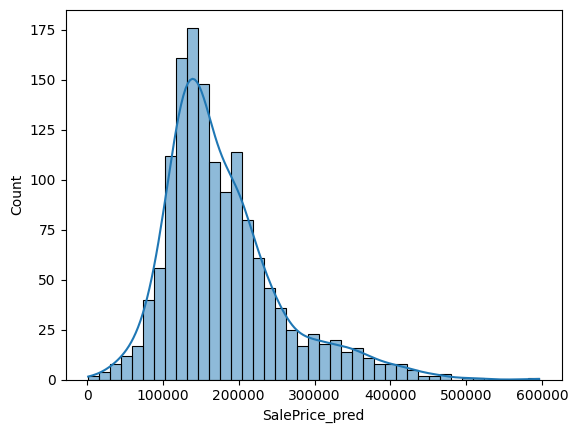

In [82]:
import seaborn as sns 
sns.histplot(data=df_final, x='SalePrice_pred', kde=True)

<Axes: xlabel='SalePrice', ylabel='Count'>

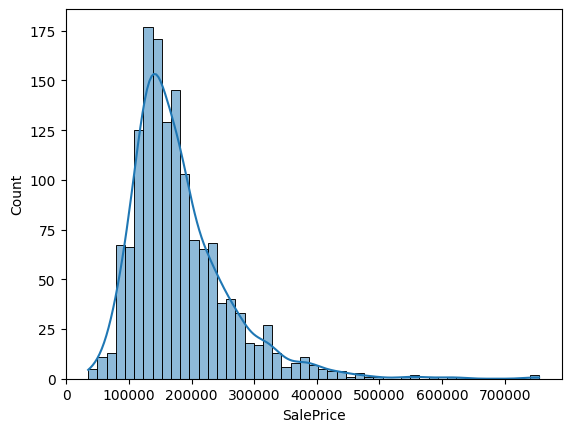

In [83]:
# Actual data
sns.histplot(data=df, x="SalePrice", kde=True)

In [84]:
df_final.to_csv("Results.csv", index=False)